In [0]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import rc

In [0]:
VEGF = pd.read_csv('sumstats/VEGF.lowering.tsv', sep='\t', index_col=0)
FA = pd.read_csv('sumstats/FA.aligned.tsv', sep='\t', index_col=0)
LS = pd.read_csv('sumstats/LS.aligned.tsv', sep='\t', index_col=0)
FN = pd.read_csv('sumstats/FN.aligned.tsv', sep='\t', index_col=0)
eBMD = pd.read_csv('sumstats/eBMD.aligned.tsv', sep='\t', index_col=0)
FX = pd.read_csv('sumstats/Fracture.aligned.tsv', sep='\t', index_col=0)

# Consider including the original files as well so that someone can verify that alleles were properly aligned.
# Include them above corresponding tables. For example, VEGF (Before alignment), VEGF (After alignment).

# Table 1 - Summary statistics for 10 genome-wide significant variants on serum VEGF level from Choi et al., 2016. 
Reference alleles and corresponding frequencies were aligned according to the VEGF decreasing allele. 

Ref: https://journals.plos.org/plosgenetics/article/file?id=10.1371/journal.pgen.1005874&type=printable

In [0]:
VEGF

,chr,pos,coded,other,coded.freq,st1.p,st2.p,st3.p,iv.beta,iv.se,iv.p,het.p,n.gene,location
rsid,,,,,,,,,,,,,,
rs114694170,5,88180196,T,C,0.96,1.000000e-10,3.500000e-12,6.800000e-13,-0.15,0.023,1.090000e-11,3.400000e-02,MEF2C,intron
rs34528081,6,43704417,T,-,0.60,1.300000e-17,3.200000e-19,1.500000e-18,-0.09,0.010,1.830000e-17,2.000000e-04,VEGFA,intergenic
rs6921438,6,43925607,A,G,0.46,0.000000e+00,0.000000e+00,0.000000e+00,-0.64,0.008,0.000000e+00,1.820000e-88,LOC100132354,intergenic
rs1740073,6,43947398,C,T,0.64,8.300000e-16,8.500000e-18,2.300000e-17,-0.09,0.010,4.400000e-17,1.710000e-05,C6orf223,intergenic
rs6993770,8,106581528,T,A,0.30,1.800000e-56,1.300000e-60,2.400000e-60,-0.16,0.010,3.830000e-55,2.010000e-06,ZFPM2,intron
rs7043199,9,2621145,A,T,0.21,3.100000e-09,8.200000e-12,5.100000e-14,-0.10,0.013,4.160000e-14,4.900000e-01,VLDLR-AS1,intron
rs2375981,9,2692583,G,C,0.46,2.500000e-92,7.500000e-100,1.500000e-100,-0.21,0.010,9.490000e-99,2.000000e-11,KCNV2,intergenic
rs10761741,10,65066186,G,T,0.57,4.600000e-15,1.100000e-16,1.200000e-19,-0.08,0.009,2.990000e-19,8.200000e-01,JMJD1C,intron
rs4782371,16,88568831,T,G,0.67,2.800000e-07,1.200000e-08,1.600000e-09,-0.07,0.011,1.260000e-09,5.700000e-01,ZFPM1,intron


# Table 2 - Linkage disequilibrium between instrumental variables that share a chromosome. 

In [0]:
pd.read_csv('sumstats/table2.tsv', sep='\t', index_col=0)

,SNP1,SNP2,R2
Chromosome,,,
6,rs6921438,rs1740073,0.0034
6,rs6921438,rs34528081,0.0025
6,rs1740073,rs34528081,0.0013
9,rs7043199,rs2375981,0.0004


# Table 3 - Summary statistics of VEGF-associated SNPs on FA, LS and FN BMD. 

In [0]:
FA

,proxy,chromosome,position,VEGF lowering,reference_allele,other_allele,eaf,beta,se,beta_95L,beta_95U,z,p-value,_-log10_p-value,q_statistic,q_p-value,i2
rsid,,,,,,,,,,,,,,,,,
rs114694170,rs114694170,5,88180196,T,T,C,0.942604,-0.000830,0.034751,-0.067282,0.068941,0.023873,0.981315,0.008191,3.48,0.323365,0.137931
rs34528081,rs11965885,6,43693094,T,T,G,0.537517,0.014661,0.015809,-0.045647,0.016326,-0.927353,0.363194,0.439862,1.04791800000000010.789659,0.000000,4.000000
rs6921438,rs6921438,6,43925607,A,A,G,0.483341,-0.011500,0.015503,-0.041886,0.018887,-0.741747,0.467057,0.330630,0.351569,0.950055,0.000000
rs1740073,rs1740073,6,43947398,C,C,T,0.563419,0.012133,0.016137,-0.043761,0.019494,-0.751918,0.460970,0.336327,0.87553,0.831328,0.000000
rs6993770,rs6993770,8,106581528,T,T,A,0.273793,0.002174,0.017431,-0.031991,0.036339,0.124712,0.902654,0.044479,3.002166,0.391291,0.000721
rs7043199,rs7043199,9,2621145,A,A,T,0.233917,-0.024731,0.018566,-0.061121,0.011659,-1.332040,0.191503,0.717823,5.107434,0.164097,0.412621
rs2375981,rs2375981,9,2692583,G,G,C,0.446106,-0.012345,0.015742,-0.043200,0.018509,-0.784222,0.441935,0.354641,3.690178,0.296921,0.187031
rs10761741,chr10:65066186,10,65066186,G,G,T,0.584234,0.023839,0.016514,-0.056205,0.008528,-1.443603,0.157006,0.804083,2.832176,0.418230,0.040000
rs4782371,rs4782371,16,88568831,T,T,G,0.702919,0.017330,0.017366,-0.051367,0.016707,-0.997939,0.327817,0.484368,1.814673,0.611747,0.000000


In [0]:
LS

,proxy,chromosome,position,VEGF lowering,reference_allele,other_allele,eaf,beta,se,beta_95L,beta_95U,z,p-value,_-log10_p-value,q_statistic,q_p-value,i2
rsid,,,,,,,,,,,,,,,,,
rs114694170,rs114694170,5,88180196,T,T,C,0.940308,0.024548,0.019575,-0.062915,0.013820,-1.254010,0.220656,0.656285,3.710096,0.715839,0.070000
rs34528081,rs11965885,6,43693094,T,T,G,0.488532,0.014420,0.009002,-0.032064,0.003224,-1.601856,0.117704,0.92921000000000016.990297999999999,0.321745,0.141668,7.000000
rs6921438,rs6921438,6,43925607,A,A,G,0.480776,0.000764,0.008673,-0.016236,0.017764,0.088107,0.931406,0.030861,6.587715,0.360662,0.089214
rs1740073,rs1740073,6,43947398,C,C,T,0.479534,0.010824,0.009137,-0.028732,0.007085,-1.184623,0.247267,0.606834,2.901578,0.821095,0.000000
rs6993770,rs6993770,8,106581528,T,T,A,0.286295,-0.008230,0.009569,-0.026985,0.010525,-0.860115,0.400890,0.396975,3.451877,0.750361,0.000000
rs7043199,rs7043199,9,2621145,A,A,T,0.228168,-0.000194,0.010830,-0.021421,0.021033,-0.017933,0.986019,0.006115,8.713671,0.190333,0.311427
rs2375981,rs2375981,9,2692583,G,G,C,0.448373,0.000059,0.008880,-0.017345,0.017463,0.006656,0.994811,0.00226,9.325188,0.156099,0.356581
rs10761741,chr10:65066186,10,65066186,G,G,T,0.576071,0.009389,0.009129,-0.027282,0.008503,-1.028575,0.313309,0.504027,1.835614,0.934179,0.070000
rs4782371,rs4782371,16,88568831,T,T,G,0.691328,0.005771,0.009631,-0.024649,0.013107,-0.599166,0.558451,0.253015,5.905789,0.433826,0.000000


In [0]:
FN

,proxy,chromosome,position,VEGF lowering,reference_allele,other_allele,eaf,beta,se,beta_95L,beta_95U,z,p-value,_-log10_p-value,q_statistic,q_p-value,i2
rsid,,,,,,,,,,,,,,,,,
rs114694170,rs114694170,5,88180196,T,T,C,0.940294,0.038518,0.016757,-0.071362,-0.005674,-2.298596,0.024528,1.61033999999999993.426815,0.904795,0,9.000000
rs34528081,rs11965885,6,43693094,T,T,G,0.488481,0.000145,0.007754,-0.015343,0.015053,-0.018684,0.985407,0.006384,9.589155,0.295053,0.165724
rs6921438,rs6921438,6,43925607,A,A,G,0.480435,-0.001484,0.007465,-0.016115,0.013147,-0.198839,0.845726,0.07277,3.860731,0.86946499999999990.0,9.000000
rs1740073,rs1740073,6,43947398,C,C,T,0.479732,0.013788,0.007847,-0.029168,0.001593,-1.757047,0.085579,1.067633,11.779762,0.161304,0.320869
rs6993770,rs6993770,8,106581528,T,T,A,0.285831,-0.002257,0.008206,-0.018342,0.013827,-0.275043,0.787836,0.103564,6.674860,0.572084,0.000000
rs7043199,rs7043199,9,2621145,A,A,T,0.228418,-0.006081,0.009301,-0.024312,0.012150,-0.653737,0.522413,0.281986,12.062539,0.148435,0.336790
rs2375981,rs2375981,9,2692583,G,G,C,0.448063,-0.009465,0.007621,-0.024402,0.005472,-1.242034,0.224235,0.649297,11.030508,0.199977,0.274739
rs10761741,chr10:65066186,10,65066186,G,G,T,0.575862,0.011981,0.007824,-0.027317,0.003355,-1.531246,0.133032,0.876044,8.031146,0.430434,0.003878
rs4782371,rs4782371,16,88568831,T,T,G,0.690941,0.007236,0.008248,-0.023402,0.008931,-0.877250,0.390692,0.408165,7.288709,0.50582799999999990.0,9.000000


# Table 4. Summary statistics of VEGF instrumental SNPs on eBMD.

In [0]:
eBMD

,proxy,CHR,BP,GENPOS,VEGF lowering,ALLELE1,ALLELE0,A1FREQ,INFO,CHISQ_LINREG,P_LINREG,BETA,SE,CHISQ_BOLT_LMM_INF,P_BOLT_LMM_INF,CHISQ_BOLT_LMM,P_BOLT_LMM
rsid,,,,,,,,,,,,,,,,,
rs114694170,rs114694170,5,88180196,1.016470,T,T,C,0.940798,0.977758,0.228494,0.630,-0.004678,0.004132,1.281480,0.260,0.716017,0.400
rs34528081,rs11965885,6,43693094,0.674156,T,T,G,0.583061,0.974735,0.252327,0.620,0.000294,0.001963,0.022409,0.880,0.111568,0.740
rs6921438,rs6921438,6,43925607,0.685440,A,A,G,0.493104,0.991209,4.242500,0.039,0.005030,0.001925,6.825870,0.009,5.755940,0.016
rs1740073,rs1740073,6,43947398,0.687489,C,C,T,0.612881,0.911066,0.035891,0.850,-0.000979,0.002051,0.227684,0.630,0.115742,0.730
rs6993770,rs6993770,8,106581528,1.260630,T,T,A,0.286129,1.000000,0.864405,0.350,-0.003371,0.002140,2.481200,0.120,2.691450,0.100
rs7043199,rs7043199,9,2621145,0.079934,A,A,T,0.231421,0.951095,2.632450,0.100,-0.002400,0.002346,1.046590,0.310,0.647821,0.420
rs2375981,rs2375981,9,2692583,0.082447,G,G,C,0.446159,0.988600,0.001549,0.970,-0.000715,0.001955,0.133933,0.710,0.278558,0.600
rs10761741,rs10761741,10,65066186,0.871248,G,G,T,0.583997,0.999742,0.584551,0.440,0.002784,0.001957,2.023420,0.150,3.099440,0.078
rs4782371,rs4782371,16,88568831,1.292580,T,T,G,0.700200,0.981851,2.104750,0.150,-0.002841,0.002124,1.789590,0.180,1.060590,0.300


# Table 5. Summary statistics of VEGF-associated SNPs on fracture. 

In [0]:
FX

,proxy,VEGF lowering,Allele1,Allele2,Freq1,FreqSE,MinFreq,MaxFreq,Effect,StdErr,P-value,N_TOTAL,N_CASES,N_CONTROLS
rsid,,,,,,,,,,,,,,
rs114694170,rs114694170,T,t,c,0.9411,0.0012,0.9408,0.9464,-0.0130,0.0145,0.3688,447431,56110.0,391321
rs34528081,rs11965885,T,t,g,0.5831,0.0003,0.5831,0.5844,0.0026,0.0069,0.7034,447431,56110.0,391321
rs6921438,rs6921438,A,a,g,0.4906,0.0066,0.3668,0.5123,0.0016,0.0060,0.7882,546699,76548.0,470151
rs1740073,rs1740073,C,c,t,0.6139,0.0043,0.3674,0.3871,0.0044,0.0072,0.5481,447430,56109.9,391320
rs6993770,rs6993770,T,t,a,0.2816,0.0167,0.5530,0.7820,0.0028,0.0067,0.6702,546701,76548.0,470153
rs7043199,rs7043199,A,a,t,0.2318,0.0014,0.2314,0.2378,0.0034,0.0082,0.6818,447430,56109.9,391321
rs2375981,rs2375981,G,g,c,0.4471,0.0062,0.3838,0.5538,0.0120,0.0068,0.0790,448136,56189.0,391948
rs10761741,rs10761741,G,g,t,0.5817,0.0086,0.2852,0.4678,-0.0008,0.0060,0.8966,546707,76549.0,470158
rs4782371,rs4782371,T,t,g,0.6999,0.0011,0.6953,0.7002,-0.0020,0.0074,0.7864,447431,56110.0,391321


In [0]:
def MR(rsidlist, beta_x, beta_y, se_y, odds=False, xlim=None, title=None, xlab=None, print_estimates=True, ndec=3):

    # Set figure size
    plt.figure(figsize=(8,3))
    
    # Fix x-axis range
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    
    # MR beta
    MR_estimate = beta_y/beta_x
    # MR beta se
    MR_se = se_y/abs(beta_x)
    # MR beta upper and low CI
    MR_95CIL = MR_estimate - 1.96 * MR_se
    MR_95CIU = MR_estimate + 1.96 * MR_se
    # MR beta p-value
    MR_p = 2*(1-norm.cdf(abs(MR_estimate)/MR_se))
    
    # Computing IVW beta
    ivw_weights = [se**(-2) for se in MR_se]
    ivw_estimate = np.dot(MR_estimate, ivw_weights) / np.sum(ivw_weights)
    # IVW beta se
    ivw_se = np.sum(ivw_weights)**(-1/2) # en.wikipedia.org/wiki/Inverse-variance_weighting
    # IVW beta upper and low CI
    ivw_95CIL = ivw_estimate - 1.96 * ivw_se
    ivw_95CIU = ivw_estimate + 1.96 * ivw_se
    # IVW beta p-value
    ivw_p = 2*(1-norm.cdf(abs(ivw_estimate)/ivw_se))
        
    if odds:
        # Express estimates as odds
        MR_estimate = np.exp(MR_estimate)
        MR_95CIL, MR_95CIU = np.exp(MR_95CIL), np.exp(MR_95CIU)
        ivw_estimate = np.exp(ivw_estimate)
        ivw_95CIL, ivw_95CIU = np.exp(ivw_95CIL), np.exp(ivw_95CIU)
        # Plot vertical line at 1
        plt.axvline(1, ls ='--', color='k',linewidth=0.5)
    else:
        plt.axvline(0, ls ='--', color='k',linewidth=0.5)
    
    # Plot IVW estimate
    plt.scatter(ivw_estimate, 0, marker='D', color='r')
    plt.plot((ivw_95CIL, ivw_95CIU), (0,0), 'k-', linewidth=1)
    
    # Plot line to separate IVW from rest. 
    plt.axhline(0.5, linewidth=0.8, linestyle='--', color='black')
    
    
    if print_estimates:
        print(title,'\nrsid\testimate\t95CIL\t95CIU\tp-value')
    
    # Plot individual MR estimates
    for i, (rsid, estimate, low, up, p) in enumerate(zip(rsidlist, MR_estimate, MR_95CIL, MR_95CIU, MR_p), start=1):
        plt.scatter(estimate, i, marker='s', color='r')
        plt.plot((low, up), (i,i), 'k-', linewidth=1)
        
        if print_estimates:
            print('%s\t%s, CI: [%s, %s], p=%s'%(rsid, 
                                                round(estimate, ndec), 
                                                round(low, ndec), 
                                                round(up, ndec), 
                                                round(p, ndec)))
    if print_estimates:
        print('%s\t%s, CI: [%s, %s], p=%s'%('ivw', 
                                            round(ivw_estimate, ndec), 
                                            round(ivw_95CIL, ndec), 
                                            round(ivw_95CIU, ndec), 
                                            round(ivw_p, ndec)))
    
    # Plot RSIDs on Y-axis.
    plt.yticks([y for y in range(len(rsidlist)+1)], 
               ['IVW (p=%s)'%round(ivw_p,2)] + ['%s (p=%s)'%(rsid,round(p,2)) for rsid,p in zip(rsidlist, MR_p)])
    if title:
        plt.title(title)
        
    if xlab:
        plt.xlabel(xlab)
    
    plt.show()

# Figure 1. Serum VEGF effects on FA, LS and FN BMD. 
Two-sample Mendelian Randomization (MR): individual and inverse variance weighted (IVW) results. MR estimates are expressed in standard deviation changes of serum VEGF level per standard deviation decrease in BMD. 


Forearm 
rsid	estimate	95CIL	95CIU	p-value
rs34528081	-0.163, CI: [-0.507, 0.181], p=0.354
rs6921438	0.018, CI: [-0.03, 0.065], p=0.458
rs1740073	-0.135, CI: [-0.486, 0.217], p=0.452
rs7043199	0.247, CI: [-0.117, 0.611], p=0.183
rs2375981	0.059, CI: [-0.088, 0.206], p=0.433
ivw	0.02, CI: [-0.024, 0.064], p=0.383


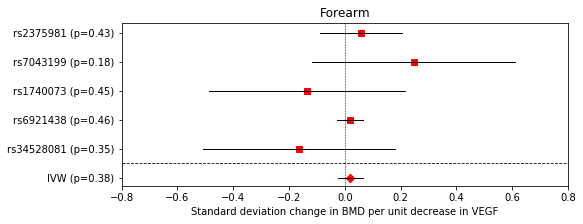

Lumbar Spine 
rsid	estimate	95CIL	95CIU	p-value
rs34528081	-0.16, CI: [-0.356, 0.036], p=0.109
rs6921438	-0.001, CI: [-0.028, 0.025], p=0.93
rs1740073	-0.12, CI: [-0.319, 0.079], p=0.236
rs7043199	0.002, CI: [-0.21, 0.214], p=0.986
rs2375981	-0.0, CI: [-0.083, 0.083], p=0.995
ivw	-0.005, CI: [-0.03, 0.019], p=0.666


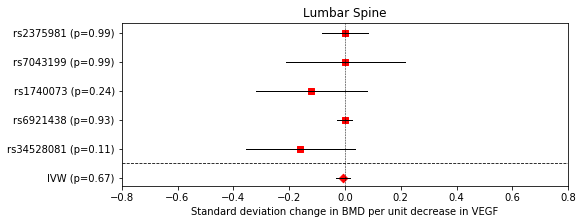

Femoral neck 
rsid	estimate	95CIL	95CIU	p-value
rs34528081	-0.002, CI: [-0.17, 0.167], p=0.985
rs6921438	0.002, CI: [-0.021, 0.025], p=0.842
rs1740073	-0.153, CI: [-0.324, 0.018], p=0.079
rs7043199	0.061, CI: [-0.121, 0.243], p=0.513
rs2375981	0.045, CI: [-0.026, 0.116], p=0.214
ivw	0.004, CI: [-0.017, 0.026], p=0.681


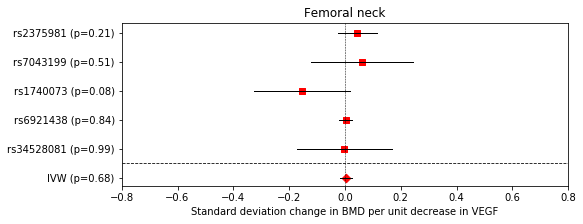

In [0]:
todrop = ['rs10761741', 'rs6993770', 'rs2639990', 'rs4782371', 'rs114694170']

# VEGF
rsidlist = VEGF.index.drop(todrop)
bx = np.array(VEGF['iv.beta'].drop(todrop))

# Forearm
by = np.array(FA['beta'].drop(todrop))
byse = np.array(FA['se'].drop(todrop))
MR(rsidlist, bx, by, byse, xlim=(-0.8,0.8), title='Forearm', 
   xlab='Standard deviation change in BMD per unit decrease in VEGF')

# Lumbar spine
by = np.array(LS['beta'].drop(todrop))
byse = np.array(LS['se'].drop(todrop))
MR(rsidlist, bx, by, byse, xlim=(-0.8,0.8), title='Lumbar Spine', 
   xlab='Standard deviation change in BMD per unit decrease in VEGF')

# Femoral neck
by = np.array(FN['beta'].drop(todrop))
byse = np.array(FN['se'].drop(todrop))
MR(rsidlist, bx, by, byse, xlim=(-0.8,0.8), title='Femoral neck', 
   xlab='Standard deviation change in BMD per unit decrease in VEGF')

# Figure 2. Serum VEGF on eBMD. 
Two-sample Mendelian Randomization (MR): individual and and inverse variance weighted (IVW) results.  


eBMD 
rsid	estimate	95CIL	95CIU	p-value
rs34528081	-0.003, CI: [-0.046, 0.039], p=0.881
rs6921438	-0.008, CI: [-0.014, -0.002], p=0.009
rs1740073	0.011, CI: [-0.034, 0.056], p=0.633
rs7043199	0.024, CI: [-0.022, 0.07], p=0.306
rs2375981	0.003, CI: [-0.015, 0.022], p=0.714
ivw	-0.006, CI: [-0.012, -0.001], p=0.031


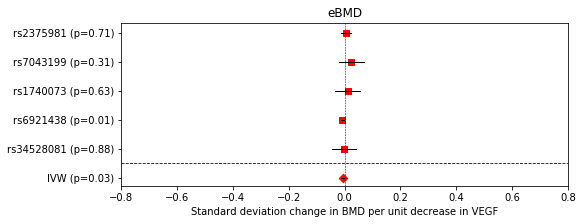

In [0]:
todrop = ['rs10761741', 'rs6993770', 'rs2639990', 'rs4782371', 'rs114694170']
rsidlist = VEGF.index.drop(todrop)
bx = np.array(VEGF['iv.beta'].drop(todrop))
by = np.array(eBMD['BETA'].drop(todrop))
byse = np.array(eBMD['SE'].drop(todrop))
MR(rsidlist, bx, by, byse, xlim=(-0.8,0.8), title='eBMD', 
   xlab='Standard deviation change in BMD per unit decrease in VEGF')

# Figure 3. Serum VEGF on odds of fracture. 
Two-sample Mendelian Randomization: individual and inverse variance weighted (IVW) results.


Fracture 
rsid	estimate	95CIL	95CIU	p-value
rs34528081	0.972, CI: [0.836, 1.129], p=0.706
rs6921438	0.998, CI: [0.979, 1.016], p=0.79
rs1740073	0.952, CI: [0.814, 1.114], p=0.541
rs7043199	0.967, CI: [0.823, 1.135], p=0.678
rs2375981	0.944, CI: [0.886, 1.006], p=0.078
ivw	0.992, CI: [0.975, 1.01], p=0.374


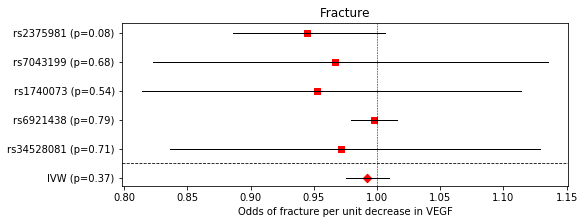

In [0]:
todrop = ['rs10761741', 'rs6993770', 'rs2639990', 'rs4782371', 'rs114694170']
rsidlist = VEGF.index.drop(todrop)
bx = np.array(VEGF['iv.beta'].drop(todrop))
by = np.array(FX['Effect'].drop(todrop))
byse = np.array(FX['StdErr'].drop(todrop))
MR(rsidlist, bx, by, byse, odds=True, title='Fracture', 
   xlab='Odds of fracture per unit decrease in VEGF')

# Supplemental Figure 1. Sensitivity analysis on DXA BMD excluding SNP rs6921438. 
Two-sample Mendelian Randomization (MR): individual and inverse variance weighted (IVW) results. MR estimates are expressed in standard deviation changes of serum VEGF level per standard deviation decrease in BMD.


Forearm 
rsid	estimate	95CIL	95CIU	p-value
rs34528081	-0.163, CI: [-0.507, 0.181], p=0.354
rs1740073	-0.135, CI: [-0.486, 0.217], p=0.452
rs7043199	0.247, CI: [-0.117, 0.611], p=0.183
rs2375981	0.059, CI: [-0.088, 0.206], p=0.433
ivw	0.03, CI: [-0.089, 0.149], p=0.62


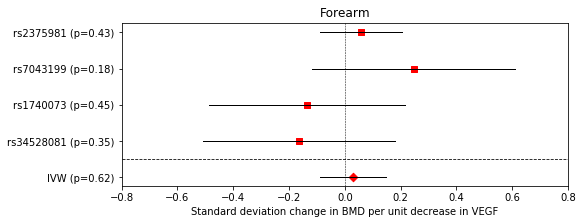

Lumbar spine 
rsid	estimate	95CIL	95CIU	p-value
rs34528081	-0.16, CI: [-0.356, 0.036], p=0.109
rs1740073	-0.12, CI: [-0.319, 0.079], p=0.236
rs7043199	0.002, CI: [-0.21, 0.214], p=0.986
rs2375981	-0.0, CI: [-0.083, 0.083], p=0.995
ivw	-0.033, CI: [-0.1, 0.035], p=0.34


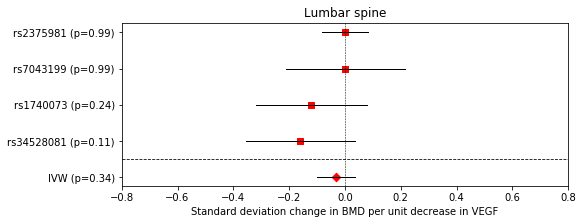

Femoral neck 
rsid	estimate	95CIL	95CIU	p-value
rs34528081	-0.002, CI: [-0.17, 0.167], p=0.985
rs1740073	-0.153, CI: [-0.324, 0.018], p=0.079
rs7043199	0.061, CI: [-0.121, 0.243], p=0.513
rs2375981	0.045, CI: [-0.026, 0.116], p=0.214
ivw	0.018, CI: [-0.04, 0.076], p=0.536


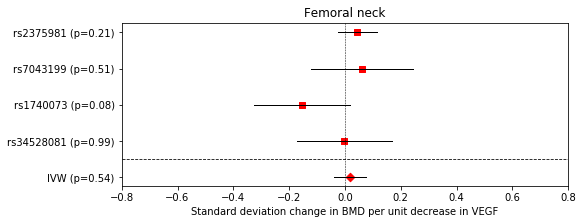

In [0]:
todrop = ['rs10761741', 'rs6993770', 'rs2639990', 'rs4782371', 'rs114694170', 'rs6921438']
rsidlist = VEGF.index.drop(todrop)
bx = np.array(VEGF['iv.beta'].drop(todrop))

by = np.array(FA['beta'].drop(todrop))
byse = np.array(FA['se'].drop(todrop))
MR(rsidlist, bx, by, byse, xlim=(-0.8,0.8), title='Forearm', 
   xlab='Standard deviation change in BMD per unit decrease in VEGF')

by = np.array(LS['beta'].drop(todrop))
byse = np.array(LS['se'].drop(todrop))
MR(rsidlist, bx, by, byse, xlim=(-0.8,0.8), title='Lumbar spine', 
   xlab='Standard deviation change in BMD per unit decrease in VEGF')

by = np.array(FN['beta'].drop(todrop))
byse = np.array(FN['se'].drop(todrop))
MR(rsidlist, bx, by, byse, xlim=(-0.8,0.8), title='Femoral neck', 
   xlab='Standard deviation change in BMD per unit decrease in VEGF')

# Supplemental Figure 2. Sensitivity analysis on eBMD excluding SNP rs6921438. 
Two-sample Mendelian Randomization (MR): individual and inverse variance weighted (IVW) results. MR estimates are expressed in standard deviation changes of serum VEGF level per standard deviation decrease in BMD.


eBMD 
rsid	estimate	95CIL	95CIU	p-value
rs34528081	-0.003, CI: [-0.046, 0.039], p=0.881
rs1740073	0.011, CI: [-0.034, 0.056], p=0.633
rs7043199	0.024, CI: [-0.022, 0.07], p=0.306
rs2375981	0.003, CI: [-0.015, 0.022], p=0.714
ivw	0.006, CI: [-0.009, 0.02], p=0.462


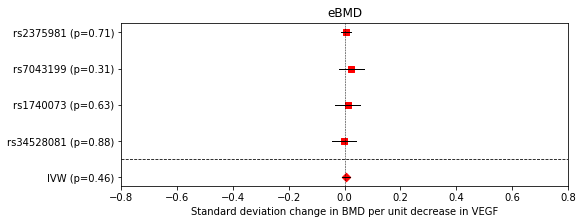

In [0]:
todrop = ['rs10761741', 'rs6993770', 'rs2639990', 'rs4782371', 'rs114694170', 'rs6921438']
rsidlist = VEGF.index.drop(todrop)
bx = np.array(VEGF['iv.beta'].drop(todrop))
by = np.array(eBMD['BETA'].drop(todrop))
byse = np.array(eBMD['SE'].drop(todrop))
MR(rsidlist, bx, by, byse, xlim=(-0.8,0.8), title='eBMD', 
   xlab='Standard deviation change in BMD per unit decrease in VEGF')

# Supplemental Figure 3. Sensitivity analysis on fracture excluding SNP rs6921438. 
Two-sample Mendelian Randomization: individual and inverse variance weighted (IVW) results.


Fracture 
rsid	estimate	95CIL	95CIU	p-value
rs34528081	0.972, CI: [0.836, 1.129], p=0.706
rs1740073	0.952, CI: [0.814, 1.114], p=0.541
rs7043199	0.967, CI: [0.823, 1.135], p=0.678
rs2375981	0.944, CI: [0.886, 1.006], p=0.078
ivw	0.951, CI: [0.903, 1.001], p=0.056


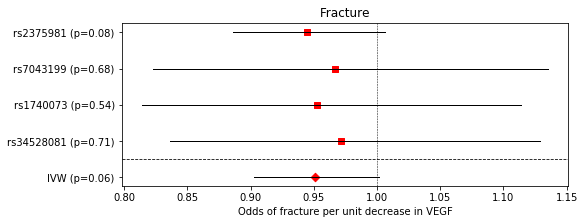

In [0]:
todrop = ['rs10761741', 'rs6993770', 'rs2639990', 'rs4782371', 'rs114694170', 'rs6921438']
rsidlist = VEGF.index.drop(todrop)
bx = np.array(VEGF['iv.beta'].drop(todrop))
by = np.array(FX['Effect'].drop(todrop))
byse = np.array(FX['StdErr'].drop(todrop))
MR(rsidlist, bx, by, byse, odds=True, title='Fracture', 
   xlab='Odds of fracture per unit decrease in VEGF')

# Supplemental Figure 4. Sensitivity analysis on DXA BMD including all 10 VEGF-decreasing alleles. 
Two-sample Mendelian Randomization (MR): individual and inverse variance weighted (IVW) results. MR estimates are expressed in standard deviation changes of serum VEGF level per standard deviation decrease in BMD

Forearm 
rsid	estimate	95CIL	95CIU	p-value
rs114694170	0.006, CI: [-0.449, 0.46], p=0.981
rs34528081	-0.163, CI: [-0.507, 0.181], p=0.354
rs6921438	0.018, CI: [-0.03, 0.065], p=0.458
rs1740073	-0.135, CI: [-0.486, 0.217], p=0.452
rs6993770	-0.014, CI: [-0.227, 0.2], p=0.901
rs7043199	0.247, CI: [-0.117, 0.611], p=0.183
rs2375981	0.059, CI: [-0.088, 0.206], p=0.433
rs10761741	-0.298, CI: [-0.703, 0.107], p=0.149
rs4782371	-0.248, CI: [-0.734, 0.239], p=0.318
rs2639990	0.213, CI: [-0.323, 0.748], p=0.436
ivw	0.014, CI: [-0.029, 0.056], p=0.522


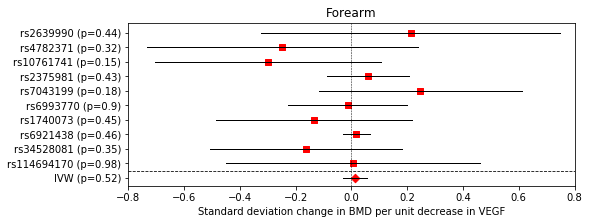

Lumbar spine 
rsid	estimate	95CIL	95CIU	p-value
rs114694170	-0.164, CI: [-0.419, 0.092], p=0.21
rs34528081	-0.16, CI: [-0.356, 0.036], p=0.109
rs6921438	-0.001, CI: [-0.028, 0.025], p=0.93
rs1740073	-0.12, CI: [-0.319, 0.079], p=0.236
rs6993770	0.051, CI: [-0.066, 0.169], p=0.39
rs7043199	0.002, CI: [-0.21, 0.214], p=0.986
rs2375981	-0.0, CI: [-0.083, 0.083], p=0.995
rs10761741	-0.117, CI: [-0.341, 0.106], p=0.304
rs4782371	-0.082, CI: [-0.352, 0.187], p=0.549
rs2639990	0.201, CI: [-0.104, 0.506], p=0.196
ivw	-0.005, CI: [-0.029, 0.019], p=0.676


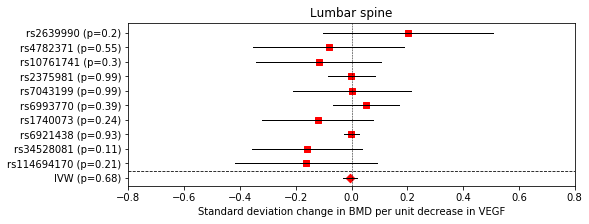

Femoral neck 
rsid	estimate	95CIL	95CIU	p-value
rs114694170	-0.257, CI: [-0.476, -0.038], p=0.022
rs34528081	-0.002, CI: [-0.17, 0.167], p=0.985
rs6921438	0.002, CI: [-0.021, 0.025], p=0.842
rs1740073	-0.153, CI: [-0.324, 0.018], p=0.079
rs6993770	0.014, CI: [-0.086, 0.115], p=0.783
rs7043199	0.061, CI: [-0.121, 0.243], p=0.513
rs2375981	0.045, CI: [-0.026, 0.116], p=0.214
rs10761741	-0.15, CI: [-0.341, 0.042], p=0.126
rs4782371	-0.103, CI: [-0.334, 0.128], p=0.38
rs2639990	-0.171, CI: [-0.433, 0.09], p=0.199
ivw	-0.001, CI: [-0.022, 0.019], p=0.917


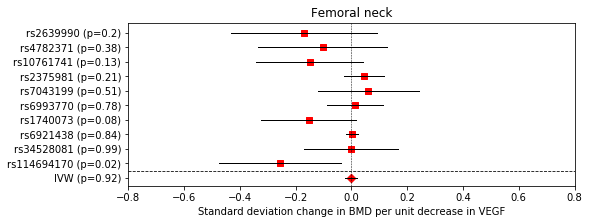

In [0]:
todrop = []
rsidlist = VEGF.index.drop(todrop)
bx = np.array(VEGF['iv.beta'].drop(todrop))

by = np.array(FA['beta'].drop(todrop))
byse = np.array(FA['se'].drop(todrop))
MR(rsidlist, bx, by, byse, xlim=(-0.8,0.8), title='Forearm', 
   xlab='Standard deviation change in BMD per unit decrease in VEGF')

by = np.array(LS['beta'].drop(todrop))
byse = np.array(LS['se'].drop(todrop))
MR(rsidlist, bx, by, byse, xlim=(-0.8,0.8), title='Lumbar spine', 
   xlab='Standard deviation change in BMD per unit decrease in VEGF')

by = np.array(FN['beta'].drop(todrop))
byse = np.array(FN['se'].drop(todrop))
MR(rsidlist, bx, by, byse, xlim=(-0.8,0.8), title='Femoral neck', 
   xlab='Standard deviation change in BMD per unit decrease in VEGF')

# Supplemental Figure 5. Sensitivity analysis on eBMD including all 10 VEGF-decreasing alleles. 
Two sample Mendelian Randomization: individual and inverse variance weighted (IVW) results. 


eBMD 
rsid	estimate	95CIL	95CIU	p-value
rs114694170	0.031, CI: [-0.023, 0.085], p=0.258
rs34528081	-0.003, CI: [-0.046, 0.039], p=0.881
rs6921438	-0.008, CI: [-0.014, -0.002], p=0.009
rs1740073	0.011, CI: [-0.034, 0.056], p=0.633
rs6993770	0.021, CI: [-0.005, 0.047], p=0.115
rs7043199	0.024, CI: [-0.022, 0.07], p=0.306
rs2375981	0.003, CI: [-0.015, 0.022], p=0.714
rs10761741	-0.035, CI: [-0.083, 0.013], p=0.155
rs4782371	0.041, CI: [-0.019, 0.1], p=0.181
rs2639990	0.055, CI: [-0.015, 0.125], p=0.122
ivw	-0.004, CI: [-0.009, 0.001], p=0.117


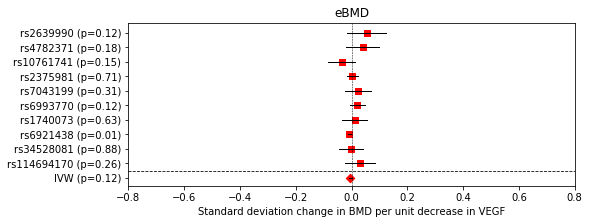

In [0]:
todrop = []
rsidlist = VEGF.index.drop(todrop)
bx = np.array(VEGF['iv.beta'].drop(todrop))
by = np.array(eBMD['BETA'].drop(todrop))
byse = np.array(eBMD['SE'].drop(todrop))
MR(rsidlist, bx, by, byse, xlim=(-0.8,0.8), title='eBMD', 
   xlab='Standard deviation change in BMD per unit decrease in VEGF')

# Supplemental Figure 6. Sensitivity analysis on fracture including all VEGF-lowering SNPs. 
Two-sample Mendelian Randomization: individual and inverse variance weighted (IVW) results.


Fracture 
rsid	estimate	95CIL	95CIU	p-value
rs114694170	1.091, CI: [0.902, 1.318], p=0.37
rs34528081	0.972, CI: [0.836, 1.129], p=0.706
rs6921438	0.998, CI: [0.979, 1.016], p=0.79
rs1740073	0.952, CI: [0.814, 1.114], p=0.541
rs6993770	0.983, CI: [0.905, 1.067], p=0.676
rs7043199	0.967, CI: [0.823, 1.135], p=0.678
rs2375981	0.944, CI: [0.886, 1.006], p=0.078
rs10761741	1.01, CI: [0.872, 1.17], p=0.894
rs4782371	1.029, CI: [0.836, 1.266], p=0.787
rs2639990	1.022, CI: [0.802, 1.302], p=0.86
ivw	0.993, CI: [0.977, 1.01], p=0.417


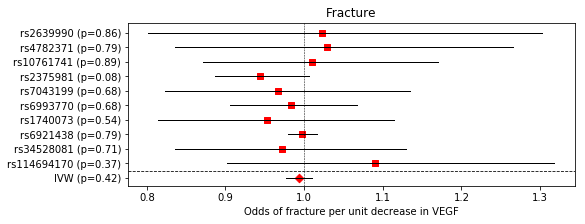

In [0]:
todrop = []
rsidlist = VEGF.index.drop(todrop)
bx = np.array(VEGF['iv.beta'].drop(todrop))
by = np.array(FX['Effect'].drop(todrop))
byse = np.array(FX['StdErr'].drop(todrop))
MR(rsidlist, bx, by, byse, odds=True, title='Fracture', 
   xlab='Odds of fracture per unit decrease in VEGF')

# Supplemental Figure 7. MR Egger DXA BMD

In [0]:
%load_ext rpy2.ipython

In [0]:
%%R 
library(MendelianRandomization)
df_x <- read.table('sumstats/VEGF.lowering.tsv', header=TRUE, sep='\t')
snps <- unlist(df_x['rsid'])
bx <- as.numeric(unlist(df_x['iv.beta']))
bxse <- as.numeric(unlist(df_x['iv.se']))

[1] "FA BMD"

MR-Egger method
(variants uncorrelated, random-effect model)

Number of Variants =  10 

------------------------------------------------------------------
      Method Estimate Std Error  95% CI       p-value
    MR-Egger    0.039     0.031 -0.021, 0.100   0.206
 (intercept)   -0.009     0.008 -0.025, 0.007   0.252
------------------------------------------------------------------
Residual Standard Error :  0.891 
Residual standard error is set to 1 in calculation of confidence interval when its estimate is less than 1.
Heterogeneity test statistic = 6.3452 on 8 degrees of freedom, (p-value = 0.6086)
I^2_GX statistic: 99.8%


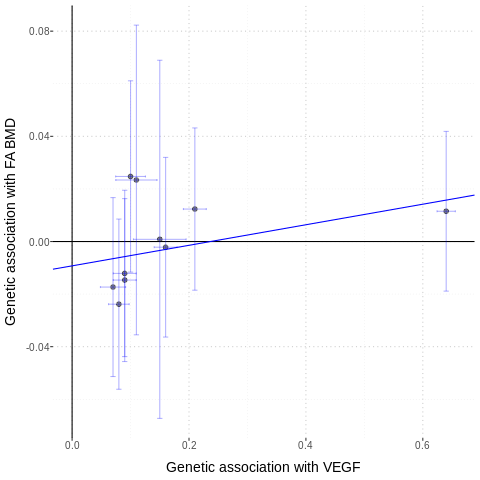

In [0]:
%%R
outcome <- 'FA BMD'
df_y <- read.table('sumstats/FA.aligned.tsv', header=TRUE, sep='\t') 
by <- as.numeric(unlist(df_y['beta']))
byse <- as.numeric(unlist(df_y['se']))

MRInputObject <- mr_input(snps=snps, bx=bx,bxse=bxse,by=by,byse=byse, exposure='VEGF', outcome=outcome)
IVWObject <- mr_ivw(MRInputObject)
EggerObject <- mr_egger(MRInputObject)
MRAllObject_all <- mr_allmethods(MRInputObject)
print(outcome)
print(EggerObject)
mr_plot(MRInputObject, error = TRUE, orientate = TRUE, line = "egger", interactive = FALSE)

[1] "LS BMD"

MR-Egger method
(variants uncorrelated, random-effect model)

Number of Variants =  10 

------------------------------------------------------------------
      Method Estimate Std Error  95% CI       p-value
    MR-Egger    0.012     0.017 -0.022, 0.045   0.505
 (intercept)   -0.006     0.005 -0.015, 0.003   0.178
------------------------------------------------------------------
Residual Standard Error :  0.961 
Residual standard error is set to 1 in calculation of confidence interval when its estimate is less than 1.
Heterogeneity test statistic = 7.3838 on 8 degrees of freedom, (p-value = 0.4958)
I^2_GX statistic: 99.8%


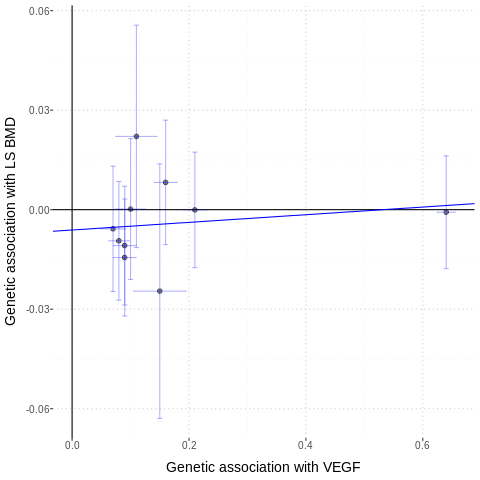

In [0]:
%%R
outcome <- 'LS BMD'
df_y <- read.table('sumstats/LS.aligned.tsv', header=TRUE, sep='\t')
by <- as.numeric(unlist(df_y['beta']))
byse <- as.numeric(unlist(df_y['se']))

MRInputObject <- mr_input(snps=snps, bx=bx,bxse=bxse,by=by,byse=byse, exposure='VEGF', outcome=outcome)
IVWObject <- mr_ivw(MRInputObject)
EggerObject <- mr_egger(MRInputObject)
MRAllObject_all <- mr_allmethods(MRInputObject)
print(outcome)
print(EggerObject)
mr_plot(MRInputObject, error = TRUE, orientate = TRUE, line = "egger", interactive = FALSE)

[1] "FN BMD"

MR-Egger method
(variants uncorrelated, random-effect model)

Number of Variants =  10 

------------------------------------------------------------------
      Method Estimate Std Error  95% CI       p-value
    MR-Egger    0.017     0.018 -0.019, 0.053   0.364
 (intercept)   -0.007     0.005 -0.016, 0.003   0.175
------------------------------------------------------------------
Residual Standard Error :  1.243 
Heterogeneity test statistic = 12.3663 on 8 degrees of freedom, (p-value = 0.1356)
I^2_GX statistic: 99.8%


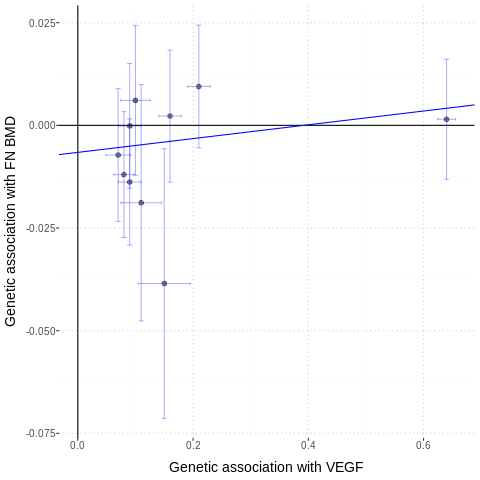

In [0]:
%%R
outcome <- 'FN BMD'
df_y <- read.table('sumstats/FN.aligned.tsv', header=TRUE, sep='\t')
by <- as.numeric(unlist(df_y['beta']))
byse <- as.numeric(unlist(df_y['se']))

MRInputObject <- mr_input(snps=snps, bx=bx, bxse=bxse, by=by, byse=byse, exposure='VEGF', outcome=outcome)
IVWObject <- mr_ivw(MRInputObject)
EggerObject <- mr_egger(MRInputObject)
MRAllObject_all <- mr_allmethods(MRInputObject)
print(outcome)
print(EggerObject)
mr_plot(MRInputObject, error = TRUE, orientate = TRUE, line = "egger", interactive = FALSE)

# Supplemental Figure 8. MR Egger eBMD

[1] "eBMD"

MR-Egger method
(variants uncorrelated, random-effect model)

Number of Variants =  10 

------------------------------------------------------------------
      Method Estimate Std Error  95% CI        p-value
    MR-Egger   -0.011     0.004 -0.019, -0.002   0.016
 (intercept)    0.002     0.001  0.000,  0.005   0.042
------------------------------------------------------------------
Residual Standard Error :  1.139 
Heterogeneity test statistic = 10.3797 on 8 degrees of freedom, (p-value = 0.2394)
I^2_GX statistic: 99.8%


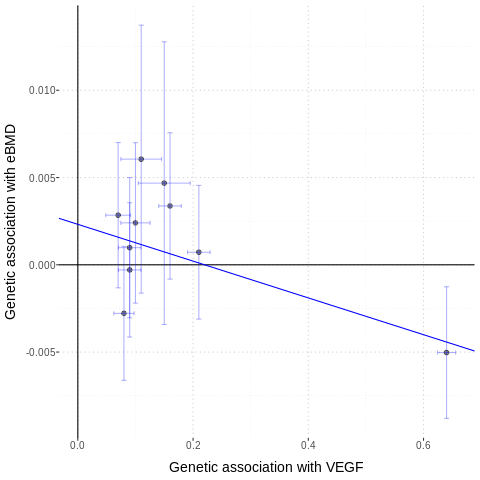

In [0]:
%%R
outcome <- 'eBMD'
df_y = read.table('sumstats/eBMD.aligned.tsv', header=TRUE, sep='\t')
by <- as.numeric(unlist(df_y['BETA']))
byse <- as.numeric(unlist(df_y['SE']))

MRInputObject <- mr_input(snps=snps, bx=bx,bxse=bxse,by=by,byse=byse, exposure='VEGF', outcome=outcome)
IVWObject <- mr_ivw(MRInputObject)
EggerObject <- mr_egger(MRInputObject)
MRAllObject_all <- mr_allmethods(MRInputObject)
print(outcome)
print(EggerObject)
mr_plot(MRInputObject, error = TRUE, orientate = TRUE, line = "egger", interactive = FALSE)

# Supplemental Figure 9. MR Egger Fracture

[1] "fracture"

MR-Egger method
(variants uncorrelated, random-effect model)

Number of Variants =  10 

------------------------------------------------------------------
      Method Estimate Std Error  95% CI       p-value
    MR-Egger   -0.002     0.012 -0.026, 0.022   0.877
 (intercept)   -0.002     0.003 -0.008, 0.005   0.559
------------------------------------------------------------------
Residual Standard Error :  0.705 
Residual standard error is set to 1 in calculation of confidence interval when its estimate is less than 1.
Heterogeneity test statistic = 3.9724 on 8 degrees of freedom, (p-value = 0.8596)
I^2_GX statistic: 99.8%


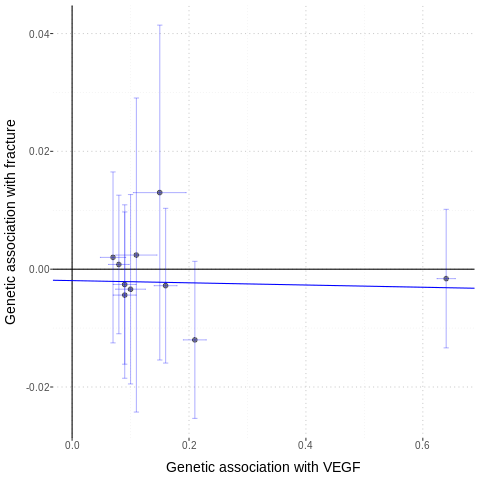

In [0]:
%%R
outcome <- 'fracture'
df_y <- read.table('sumstats/Fracture.aligned.tsv', header=TRUE, sep='\t')
by <- as.numeric(unlist(df_y['Effect']))
byse <- as.numeric(unlist(df_y['StdErr']))

MRInputObject <- mr_input(snps=snps, bx=bx,bxse=bxse,by=by,byse=byse, exposure='VEGF', outcome=outcome)
IVWObject <- mr_ivw(MRInputObject)
EggerObject <- mr_egger(MRInputObject)
MRAllObject_all <- mr_allmethods(MRInputObject)
print(outcome)
print(EggerObject)
mr_plot(MRInputObject, error = TRUE, orientate = TRUE, line = "egger", interactive = FALSE)